### Import libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
%matplotlib inline
import itertools
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'DejaVu Sans'
import seaborn as sns
%matplotlib 
# To be able to save images on server
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot

from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow.compat.v1.keras import backend as K
#from keras.models import Sequential
from tensorflow.keras.models import Sequential
from keras.layers import LSTM , BatchNormalization
from keras.layers.core import Dense, Dropout
from keras.regularizers import L1L2

Using matplotlib backend: agg


In [ ]:
# Read train and test data
train=pd.read_csv("/content/drive/MyDrive/DataSet CS/HumanActivityRecognition/HAR/UCI_HAR_Dataset/csv_files/train.csv")
test=pd.read_csv("/content/drive/MyDrive/DataSet CS/HumanActivityRecognition/HAR/UCI_HAR_Dataset/csv_files/test.csv")

In [ ]:
print(train.shape,test.shape)

(7352, 564) (2947, 564)


In [ ]:
X_train=train.drop(['subject','Activity','ActivityName'],axis=1)
y_train=train.Activity
X_test=test.drop(['subject','Activity','ActivityName'],axis=1)
y_test=test.Activity

### Stacked ensemble model with LogisticRegression as a meta classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
estimator_list = [
    ('lr',LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
 intercept_scaling=1, max_iter=100,
 n_jobs=None, penalty='l2', random_state=None,
 tol=0.0001, verbose=0, warm_start=False)),
    ('svm',LinearSVC(C=2, class_weight=None, dual=True, fit_intercept=True,
 intercept_scaling=1, loss='squared_hinge', max_iter=1000,
 multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
 verbose=0)),
    ('RSVM',SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
 decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
 max_iter=-1, probability=False, random_state=None, shrinking=True,
 tol=0.001, verbose=False))]

In [ ]:
# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

In [ ]:
stack_model.fit(X_train,y_train)
y_pred=stack_model.predict(X_test)
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
print(accuracy)
print(cm)

0.9531727180183237
[[489   5   2   0   0   0]
 [ 49 421   1   0   0   0]
 [  5  10 405   0   0   0]
 [  0   0   0 435  56   0]
 [  0   0   0  10 522   0]
 [  0   0   0   0   0 537]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.99      0.94       496
           2       0.97      0.89      0.93       471
           3       0.99      0.96      0.98       420
           4       0.98      0.89      0.93       491
           5       0.90      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.96      0.95      0.95      2947
weighted avg       0.96      0.95      0.95      2947



In [ ]:
%matplotlib inline
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

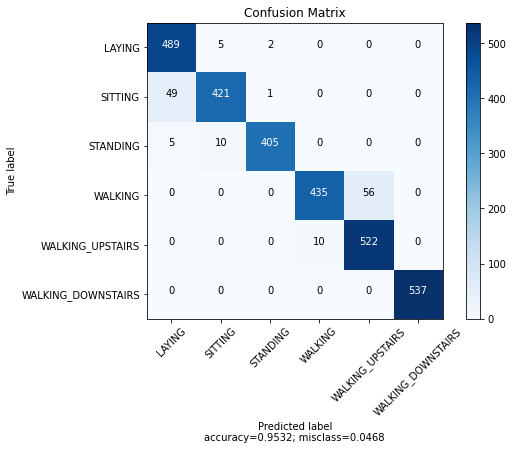

In [ ]:
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names=['LAYING','SITTING','STANDING','WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS'],
                      title        = "Confusion Matrix")


In [ ]:
train['ActivityName'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier

### Stacked ensemble model with RBF SVM as a meta classifier

In [ ]:
# Build stack model
clf = StackingClassifier(
    estimators=estimator_list, final_estimator=SVC()
)

In [ ]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
print(accuracy)
print(cm)

0.9667458432304038
[[491   2   3   0   0   0]
 [ 18 451   2   0   0   0]
 [  2   9 409   0   0   0]
 [  0   1   0 439  51   0]
 [  0   0   0  10 522   0]
 [  0   0   0   0   0 537]]


In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.99      0.98       496
           2       0.98      0.96      0.97       471
           3       0.99      0.98      0.98       420
           4       0.97      0.90      0.93       491
           5       0.91      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947



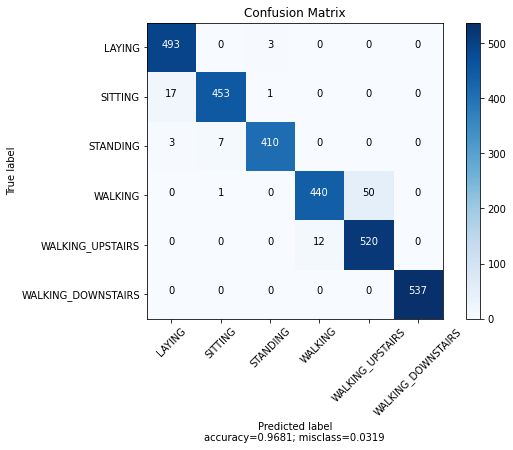

In [ ]:
# plot colored confusion matrix
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names=['LAYING','SITTING','STANDING','WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS'],
                      title        = "Confusion Matrix")